In [37]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [38]:
# define the initial system state (x, y, z positions in space)
initial_state = [1., 0.1, 0.6]

# define the system parameters sigma, rho, and beta
a = 0.2 
b = np.arange(0, 2, 0.0013)     #np.arange(0, 2, 0.0013), 0.2
c = 5.7    #5.7, np.arange(45, 0, -0.036)

# define the time points to solve for, evenly spaced between the start and end times
start_time = 0
end_time = 60
interval = 100
tspan = np.linspace(start_time, end_time, end_time * interval) 

In [39]:
# define the roessler system
def roessler_system(current_state, t, a, b, c):
    x, y, z = current_state
    dx_dt = - (y + z)
    dy_dt = x + a * y
    dz_dt = b + z * (x - c)
    
    return [dx_dt, dy_dt, dz_dt]

In [40]:
# define the function to find local extrema points
def find_extrema(points, length, parameter, n, result):
    for i in range(length - 1):
        if points[i-1][n] < points[i][n] and points[i][n] > points[i+1][n]:
            temp = np.array([parameter, points[i][n]])
            result = np.append(result, temp.reshape(1, 2), axis=0)
        elif points[i-1][n] > points[i][n] and points[i][n] < points[i+1][n]:
            temp = np.array([parameter, points[i][n]])
            result = np.append(result, temp.reshape(1, 2), axis=0)
    return result

In [41]:
# define the function
def bifurcation_diagram(result, n):
    for b_ind in range(len(b)):
        
        # get the points, by solving the system of equations
        points = odeint(roessler_system, initial_state, tspan, args=(a, b[b_ind], c))
        length = len(points)
        
        # save to the 'result' local extrema points
        result = find_extrema(points, length, b[b_ind], n, result)

        # save end value for next initial state
        initial_state[0], initial_state[1], initial_state[2] = points[:, 0][length - 1], points[:, 1][length - 1], points[:, 2][length - 1]
    
    return result

In [42]:
# define function for plotting
def plotting(res, ylabel):
    fig = plt.figure(figsize=(12, 9))
    plt.scatter(res[:, 0], res[:, 1], color="black", s=0.7, alpha=0.2, label='a= ' + str(a) + '\nc= ' + str(c))
    plt.title("Roessler system bifurcation diagram")
    plt.legend(loc='best')
    plt.xlabel('c')
    plt.ylabel(ylabel)
    #plt.xlim(0, 50)
    #plt.ylim(0, 85)
    plt.grid()
    plt.show()

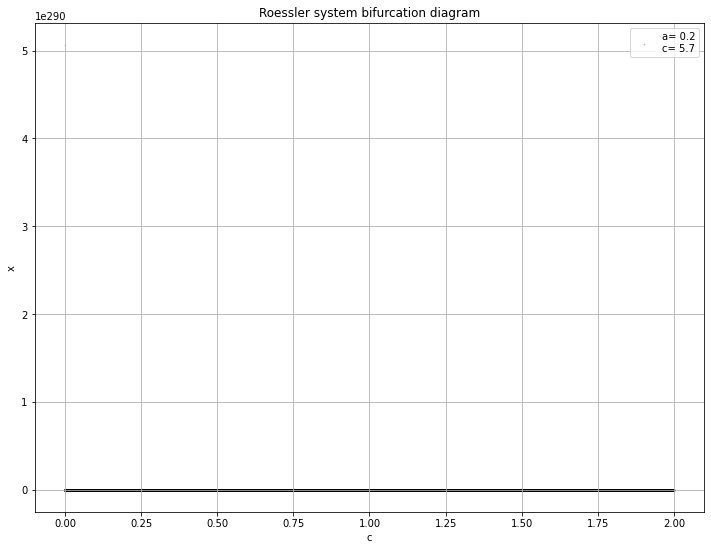

In [43]:
# define array to store results
res = np.array([[0, 0]])

# call the function
res = bifurcation_diagram(res, 0)     #n - ordinal number of the coordinate (x = 0, y = 1, z = 2)
plotting(res, 'x')

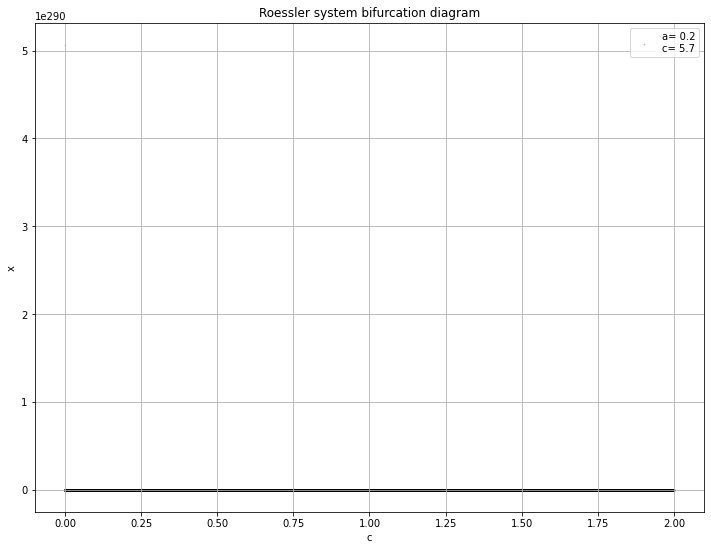

In [44]:
plotting(res, 'x')

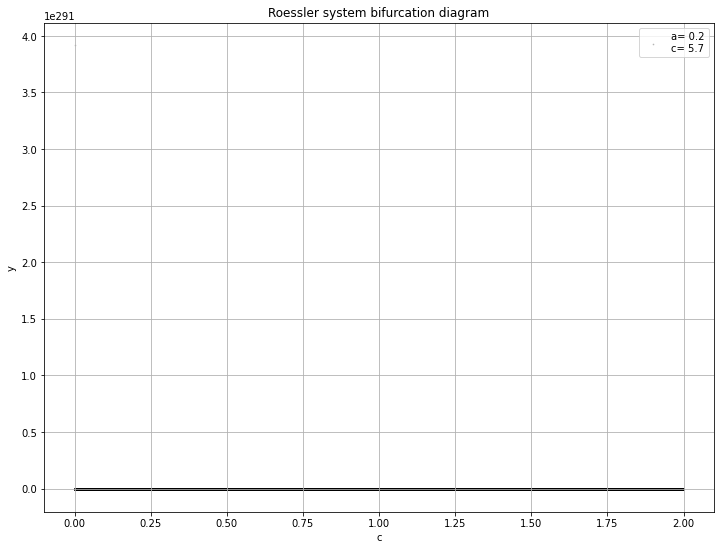

In [45]:
res = np.array([[0, 0]])
res = bifurcation_diagram(res, 1)
plotting(res, 'y')

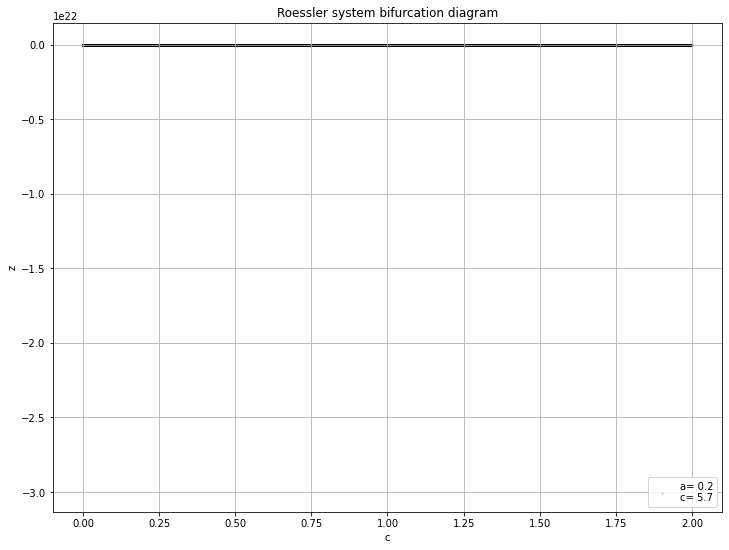

In [46]:
res = np.array([[0, 0]])
res = bifurcation_diagram(res, 2)
plotting(res, 'z')